<a href="https://colab.research.google.com/github/vkumar22/NCSULib_Workshop/blob/master/Copy_of_Data_Cleaning_with_Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning with Python**  
An NCSU Libraries Workshop  
Instructor: Alison Blaine, ablaine@ncsu.edu



### Welcome! In this workshop, we'll learn how to do the following:
* load in python libraries for data cleaning (pandas) and graphing (matplotlib)
* read csv files into Python from an internet source
* examine the first and last few rows of the data
* delete duplicates
* filter the data to create subsets
* sort the data
* group the data for plotting
* drop variables from the dataset
* create new variables
* generate and save summary statistics for a dataset

### Step 1. We'll start by loading in the required Python libraries.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Next, we'll load in a dataset from the internet. This dataset is a CSV (comma separated values) file.

In [0]:
url="https://raw.githubusercontent.com/alblaine/data-USstates/master/state-population.csv"

dat=pd.read_csv(url)

### Step 3. Type dat.head() to see the first 5 rows of the dataset. Then click the run button.

In [4]:
dat.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


### Step 4. Rename the state/region column to state_region using rename().

In [0]:
dat.rename(columns={'state/region':'state_region'},inplace=True)
dat

### Step 5. Print out the unique values in the state_region column using drop_duplicates().

In [0]:
dat.state_region.drop_duplicates()

### Step 6. Filter out all rows except for NC using query().

In [9]:
dat_filtered = dat.query('state_region=="NC"')
dat_filtered.head()

,state_region,ages,year,population
1584,NC,under18,1990,1625804.0
1585,NC,total,1990,6664016.0
1586,NC,total,1991,6784280.0
1587,NC,under18,1991,1640394.0
1588,NC,total,1993,7042818.0


### Step 7. Order the columns by year using sort_values().

In [10]:
dat_sorted =dat_filtered.sort_values(['year'])
dat_sorted.head()


,state_region,ages,year,population
1584,NC,under18,1990,1625804.0
1585,NC,total,1990,6664016.0
1586,NC,total,1991,6784280.0
1587,NC,under18,1991,1640394.0
1590,NC,under18,1992,1674144.0


### Step 8. Try to make a basic line plot showing year (X) and population (Y) using the plot() function from matplotlib.

First, let's choose a chart theme.

In [11]:
print(plt.style.available)  # note: this command lists all the themes available

['seaborn', 'grayscale', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-dark-palette', 'seaborn-colorblind', 'seaborn-talk', 'ggplot', 'seaborn-bright', 'seaborn-dark', 'fast', 'seaborn-white', 'fivethirtyeight', 'seaborn-muted', 'seaborn-deep', 'bmh', 'classic', 'seaborn-paper', 'dark_background', 'seaborn-whitegrid', 'seaborn-notebook', 'Solarize_Light2', '_classic_test', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn-ticks']


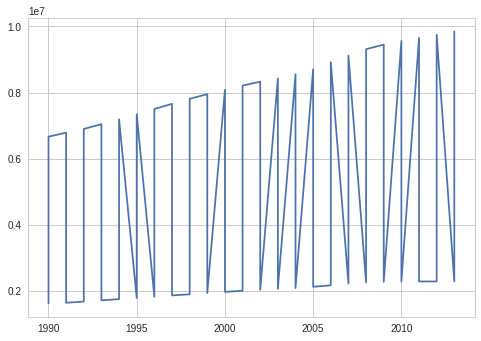

In [12]:
plt.style.use('seaborn-whitegrid') # note: this selects a plot theme and all future plots will have this theme


plt.plot(dat_sorted.year,dat_sorted.population) # note: the plt at the beginning tells python that the plot function comes from matplotlib

This didn't look good because Python thought we needed to connect all of the data points with one line. But we want two lines: one for under18, and one for total.

In [13]:
dat_sorted.ages      

1584    under18
1585      total
1586      total
1587    under18
1590    under18
1591      total
1588      total
1589    under18
1592    under18
1593      total
1595    under18
1594      total
1596    under18
1597      total
1600      total
1601    under18
1598    under18
1599      total
1604      total
1605    under18
1602      total
1603    under18
1607    under18
1606      total
1608      total
1609    under18
1612      total
1613    under18
1610      total
1611    under18
1614      total
1615    under18
1617    under18
1616      total
1621    under18
1620      total
1619    under18
1618      total
1624      total
1625    under18
1626      total
1627    under18
1629      total
1628    under18
1630    under18
1631      total
1622    under18
1623      total
Name: ages, dtype: object

### Step 9. Let's try grouping the data on the **ages** variable.

ages
total      AxesSubplot(0.125,0.125;0.775x0.755)
under18    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

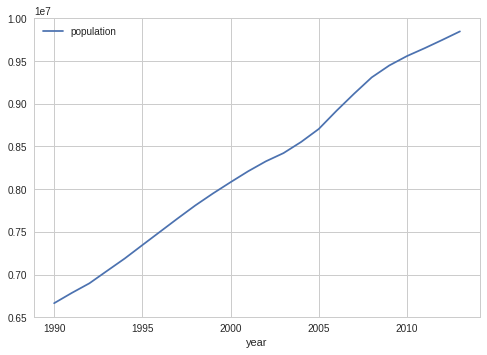

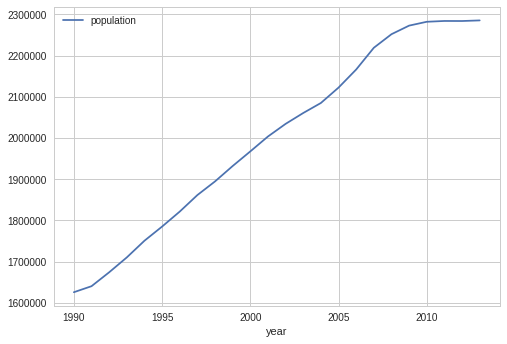

In [15]:
dat_sorted.groupby('ages').plot(x='year', y='population')

### Step 10. To get the lines on the same graph, we need to make use of the subplots() function from matplotlib. This just tells python to draw the lines on the same chart.


ages
total      AxesSubplot(0.125,0.125;0.775x0.755)
under18    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

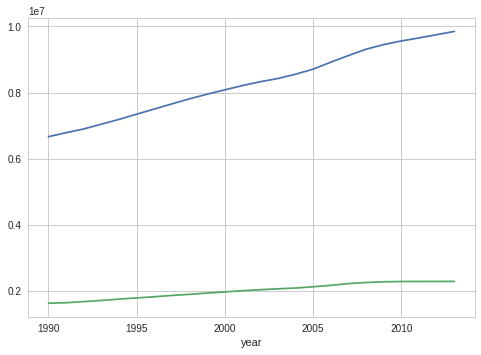

In [16]:
fig, ax = plt.subplots()

dat_sorted.groupby( 'ages'  ).plot(x= 'year'   , y= 'population'   , ax=ax    , legend=False    )

### Step 11. Pandas has a pivot table feature that will allow us to separate the ages column into two columns, one for each age category (under18 and total). 

In [17]:
dat_pivot = pd.pivot_table(dat_sorted         , index=['state_region','year'       ], values=[ 'population'      ], columns=[ 'ages'   ])   # see the documentation here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

dat_pivot.head()

population           
ages                   total    under18
state_region year                      
NC           1990  6664016.0  1625804.0
             1991  6784280.0  1640394.0
             1992  6897214.0  1674144.0
             1993  7042818.0  1710267.0
             1994  7187398.0  1750754.0

### Step 12. Now that we have pivoted the data, we have to figure out how to access the data in each column. 

Type **dat_pivot.year** and run the code. Note there is an error. That is because year is an index value. Index values can't be called like regular variables.



In [18]:
dat_pivot.year

AttributeError: ignored

Type **dat_pivot.reset_index()** to turn index values back into columns. This will make year into a regular column again.


In [0]:
dat_pivot = dat_pivot.reset_index()



Now type **dat_pivot.year** and run the code. This should work.

In [20]:
 dat_pivot.year



0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
Name: year, dtype: int64

Type **dat_pivot.total** and run the code. Notice there is an error. That's because the total variable is nested under the population field.


Type **dat_pivot.population.total** and run the code. Why does this work?

In [22]:
dat_pivot.population.total

0     6664016.0
1     6784280.0
2     6897214.0
3     7042818.0
4     7187398.0
5     7344674.0
6     7500670.0
7     7656825.0
8     7809122.0
9     7949362.0
10    8081614.0
11    8210122.0
12    8326201.0
13    8422501.0
14    8553152.0
15    8705407.0
16    8917270.0
17    9118037.0
18    9309449.0
19    9449566.0
20    9559533.0
21    9651377.0
22    9748364.0
23    9848060.0
Name: total, dtype: float64

### Step 13. Here's another way to make the graph that we made earlier in step 10 using the pivoted data. Since we have two separate columns for ages (under18 and total), we can create the following line graphs: 
* **X1=year, Y1=total**
* **X2=year, Y2=under18**

---



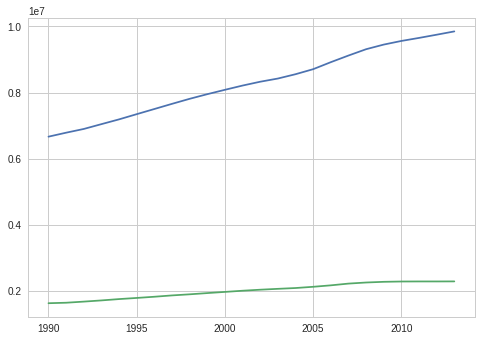

In [23]:
plt.plot(dat_pivot.year, dat_pivot.population.total       )
plt.plot(dat_pivot.year,dat_pivot.population.under18       )

### Step 14. Read in a new dataset using pd.read_csv().

In [0]:
url="https://raw.githubusercontent.com/alblaine/data-1/master/bad-drivers/bad-drivers.csv"

drivers = pd.read_csv(url)

### Step 15. Look at the data using the head() command.

In [25]:
drivers.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Step 16. Look at the column headers for this dataset using .columns

In [27]:
drivers.columns

Index(['State',
       'Number of drivers involved in fatal collisions per billion miles',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
       'Car Insurance Premiums ($)',
       'Losses incurred by insurance companies for collisions per insured driver ($)'],
      dtype='object')

### Step 17. Rename the columns to shorter names using rename()

In [0]:
drivers_renamed = drivers.rename(columns={'Number of drivers involved in fatal collisions per billion miles':'num_per_billion',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding':'%_speeding',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired':'%_alcohol_impaired',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted':'%_not_distracted',
       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents':'%_no_accidents',
       'Car Insurance Premiums ($)':'premiums',
       'Losses incurred by insurance companies for collisions per insured driver ($)':'losses'})
                       
                                 

In [31]:
drivers_renamed.head()


,State,num_per_billion,%_speeding,%_alcohol_impaired,%_not_distracted,%_no_accidents,premiums,losses
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Step 18. Create a new dataset keeping only the state, premiums, and losses columns.

In [33]:
drivers_pl = drivers_renamed.iloc[:, [0, 6, 7]]  # keep only the columns that are in the 0th, 6th, and 7th column position in the dataset
drivers_pl



,State,premiums,losses
0,Alabama,784.55,145.08
1,Alaska,1053.48,133.93
2,Arizona,899.47,110.35
3,Arkansas,827.34,142.39
4,California,878.41,165.63
5,Colorado,835.50,139.91
6,Connecticut,1068.73,167.02
7,Delaware,1137.87,151.48
8,District of Columbia,1273.89,136.05
9,Florida,1160.13,144.18


### Step 19. Create a new variable, ratio, that is the ratio of losses to premiums (ratio= losses/premiums)

In [0]:
drivers_pl = drivers_pl.assign(ratio=drivers_pl.losses/drivers_pl.premiums              )

### Step 20. Create a scatter plot showing premiums = X, losses = Y.

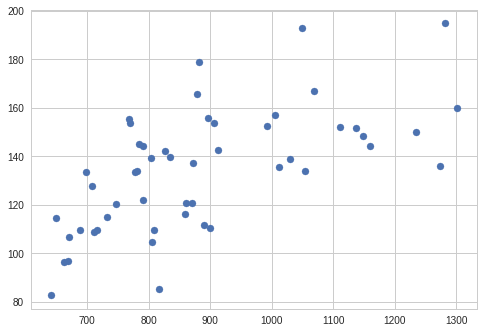

In [36]:
plt.scatter(drivers_pl.premiums,drivers_pl.losses      )

### Step 21. Get summary statistics about the drivers_pl dataset.

Type drivers_pl.describe()

In [37]:
drivers_pl.describe()

,premiums,losses,ratio
count,51.000000,51.000000,51.000000
mean,886.957647,134.493137,0.153809
std,178.296285,24.835922,0.024613
min,641.960000,82.750000,0.104324
25%,768.430000,114.645000,0.134411
50%,858.970000,136.050000,0.154258
75%,1007.945000,151.870000,0.171844
max,1301.520000,194.780000,0.202902


### Step 22. Save the summary statistics into their own dataset.

In [0]:
dpl_summary = drivers_pl.describe()


In [39]:
dpl_summary

,premiums,losses,ratio
count,51.000000,51.000000,51.000000
mean,886.957647,134.493137,0.153809
std,178.296285,24.835922,0.024613
min,641.960000,82.750000,0.104324
25%,768.430000,114.645000,0.134411
50%,858.970000,136.050000,0.154258
75%,1007.945000,151.870000,0.171844
max,1301.520000,194.780000,0.202902


### Step 23. Access the mean of the premiums column using .loc or .iloc

In [40]:
dpl_summary.loc['mean', 'premiums']

886.9576470588232

In [41]:
dpl_summary.iloc[1,0]

886.9576470588232

### Step 24. Transpose columns and rows in dpl_summary using transpose()

In [42]:
dpl_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
premiums,51.0,886.957647,178.296285,641.960000,768.430000,858.970000,1007.945000,1301.520000
losses,51.0,134.493137,24.835922,82.750000,114.645000,136.050000,151.870000,194.780000
ratio,51.0,0.153809,0.024613,0.104324,0.134411,0.154258,0.171844,0.202902


### Step 25. Practice. Read in a new dataset from the url provided using the read_csv() command. Name the dataset 'exdat'.

In [44]:
url = "https://raw.githubusercontent.com/alblaine/exchange-rates/master/data/annual.csv"

exdat = pd.read_csv(url) 

exdat.head()

,Date,Country,Exchange rate
0,1971-01-01,Australia,0.880282
1,1972-01-01,Australia,0.838715
2,1973-01-01,Australia,0.704722
3,1974-01-01,Australia,0.694975
4,1975-01-01,Australia,0.764701


### Step 26. Create a year column based on the Date column (ex: 1971)

Note that **.assign** creates a new column, **pd.DatetimeIndex()** converts the Date column into a Date object in Python, and **.year** extracts the year value.

In [0]:
exdat = exdat.assign(year=pd.DatetimeIndex(exdat['Date']).year)  # see the Pandas docs here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html


### Step. 27. Delete the Date column using drop().

In [47]:
exdat = exdat.drop(columns=[ 'Date'   ])
exdat.head()

,Country,Exchange rate,year
0,Australia,0.880282,1971
1,Australia,0.838715,1972
2,Australia,0.704722,1973
3,Australia,0.694975,1974
4,Australia,0.764701,1975


### Step 28. Practice. Filter the data to only include China and Mexico using the query() function. See Step 6 for an example.

In [0]:
exdat_filtered = exdat.query('Country=="China" or Country=="Mexico"')

### Step 29. Practice. Rename the "Exchange rate" column to "rate". We shouldn't have spaces in our variable names. See Step 4 for an example.

In [0]:
exdat_filtered = exdat_filtered.rename(columns={'Exchange rate':'rate'})

### Step 30. Practice. Create a line graph showing how the exchange rates have changed over time for China and Mexico. See Step 9 for an example.
Note: **year** should be the variable on the X axis and **rate** should be the variable on the Y axis. Both lines should be in the same graph.
Hint: use .group_by and .plot functions

Country
China     AxesSubplot(0.125,0.125;0.775x0.755)
Mexico    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

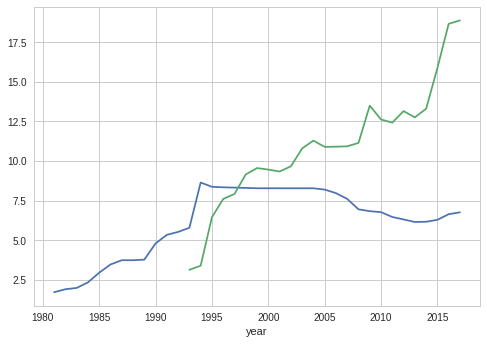

In [55]:
fig, ax=plt.subplots()
exdat_filtered.groupby('Country').plot(x='year',y='rate',ax=ax,legend=False)

